In [1]:
import pandas as pd
import numpy as np                    
import seaborn as sns                  
import matplotlib.pyplot as plt        

In [2]:
train=pd.read_csv("https://raw.githubusercontent.com/vaasu2002/Analytics-Vidhya/main/Loan%20Prediction/train_ctrUa4K.csv")
test=pd.read_csv("https://raw.githubusercontent.com/vaasu2002/Analytics-Vidhya/main/Loan%20Prediction/test_lAUu6dG.csv")

In [3]:
train.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
248,LP001824,Male,Yes,1,Graduate,No,2882,1843.0,123.0,480.0,1.0,Semiurban,Y
390,LP002255,Male,No,3+,Graduate,No,9167,0.0,185.0,360.0,1.0,Rural,Y
480,LP002534,Female,No,0,Not Graduate,No,4350,0.0,154.0,360.0,1.0,Rural,Y
550,LP002778,Male,Yes,2,Graduate,Yes,6633,0.0,NaN,360.0,0.0,Rural,N
351,LP002140,Male,No,0,Graduate,No,8750,4167.0,308.0,360.0,1.0,Rural,N
291,LP001938,Male,Yes,2,Graduate,No,4400,0.0,127.0,360.0,0.0,Semiurban,N
92,LP001319,Male,Yes,2,Not Graduate,No,3273,1820.0,81.0,360.0,1.0,Urban,Y
382,LP002231,Female,No,0,Graduate,No,6000,0.0,156.0,360.0,1.0,Urban,Y
444,LP002424,Male,Yes,0,Graduate,No,7333,8333.0,175.0,300.0,NaN,Rural,Y
531,LP002720,Male,Yes,3+,Graduate,No,4281,0.0,100.0,360.0,1.0,Urban,Y


In [4]:
test.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
175,LP001999,Male,Yes,2,Graduate,NaN,4912,4614,160.0,360.0,1.0,Rural
130,LP001703,Male,Yes,0,Graduate,No,3333,1270,124.0,360.0,1.0,Urban
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
158,LP001878,Male,No,1,Graduate,No,5823,2529,187.0,360.0,1.0,Semiurban
119,LP001622,Male,Yes,2,Graduate,No,724,3510,213.0,360.0,0.0,Rural
285,LP002572,Male,Yes,1,Graduate,NaN,8750,0,297.0,360.0,1.0,Urban
173,LP001979,Male,No,0,Graduate,No,3017,2845,159.0,180.0,0.0,Urban
273,LP002495,Male,Yes,2,Graduate,No,5667,440,130.0,360.0,0.0,Semiurban
18,LP001108,Male,Yes,0,Graduate,No,9226,7916,300.0,360.0,1.0,Urban
281,LP002561,Male,Yes,0,Graduate,No,5000,0,126.0,360.0,1.0,Rural


In [5]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
print(f"train data length: {len(train)}")
print(f"test data length: {len(test)}")

train data length: 614
test data length: 367


In [7]:
for i in train.columns:
  print(f"{i} : {len(train[i].unique())}")

Loan_ID : 614
Gender : 3
Married : 3
Dependents : 5
Education : 2
Self_Employed : 3
ApplicantIncome : 505
CoapplicantIncome : 287
LoanAmount : 204
Loan_Amount_Term : 11
Credit_History : 3
Property_Area : 3
Loan_Status : 2


In [8]:
train.drop('Loan_ID',axis = 1,inplace = True)
test.drop('Loan_ID',axis = 1,inplace = True)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [10]:
test.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [11]:
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
categorial_list = []
var_list = []
for x in train.columns:
  if(train[x].dtype=='object'):
    categorial_list.append(x)
  elif(train[x].dtype=='int64'):
    var_list.append(x)
  elif(train[x].dtype=='float64'):
    var_list.append(x)

In [13]:
print(f"categorial list:- {categorial_list}")
print(f"variable list:- {var_list}")

categorial list:- ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
variable list:- ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [14]:
train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [15]:
test['Gender'].value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [16]:
train["Gender"].fillna("Male", inplace = True)

In [17]:
test["Gender"].fillna("Male", inplace = True)

In [18]:
d={'Male':0, 'Female':1}
train['Gender']=train['Gender'].apply(lambda x:d[x])

In [19]:
d={'N':0, 'Y':1}
train['Loan_Status']=train['Loan_Status'].apply(lambda x:d[x])

In [20]:
train['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [21]:
corr = train.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Gender,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
Gender,1.00,-0.06,-0.08,-0.11,0.07,-0.01,-0.02
ApplicantIncome,-0.06,1.00,-0.12,0.57,-0.05,-0.01,-0.00
CoapplicantIncome,-0.08,-0.12,1.00,0.19,-0.06,-0.00,-0.06
LoanAmount,-0.11,0.57,0.19,1.00,0.04,-0.01,-0.04
Loan_Amount_Term,0.07,-0.05,-0.06,0.04,1.00,0.00,-0.02
Credit_History,-0.01,-0.01,-0.00,-0.01,0.00,1.00,0.56
Loan_Status,-0.02,-0.00,-0.06,-0.04,-0.02,0.56,1.00


In [22]:
train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [23]:
test['Married'].value_counts()            

Yes    233
No     134
Name: Married, dtype: int64

In [24]:
train["Married"].fillna("Yes", inplace = True)
test["Married"].fillna("Yes", inplace = True)

In [25]:
d={'No':0, 'Yes':1}
train['Married']=train['Married'].apply(lambda x:d[x])

In [26]:
corr = train.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Gender,Married,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
Gender,1.00,-0.36,-0.06,-0.08,-0.11,0.07,-0.01,-0.02
Married,-0.36,1.00,0.05,0.08,0.15,-0.10,0.01,0.09
ApplicantIncome,-0.06,0.05,1.00,-0.12,0.57,-0.05,-0.01,-0.00
CoapplicantIncome,-0.08,0.08,-0.12,1.00,0.19,-0.06,-0.00,-0.06
LoanAmount,-0.11,0.15,0.57,0.19,1.00,0.04,-0.01,-0.04
Loan_Amount_Term,0.07,-0.10,-0.05,-0.06,0.04,1.00,0.00,-0.02
Credit_History,-0.01,0.01,-0.01,-0.00,-0.01,0.00,1.00,0.56
Loan_Status,-0.02,0.09,-0.00,-0.06,-0.04,-0.02,0.56,1.00


In [27]:
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [28]:
test['Dependents'].value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [29]:
train["Dependents"].fillna(0, inplace = True)

In [30]:
test["Dependents"].fillna(0, inplace = True)

In [31]:
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
0      15
Name: Dependents, dtype: int64

In [32]:
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
0      15
Name: Dependents, dtype: int64

In [33]:
corr = train.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Gender,Married,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
Gender,1.00,-0.36,-0.06,-0.08,-0.11,0.07,-0.01,-0.02
Married,-0.36,1.00,0.05,0.08,0.15,-0.10,0.01,0.09
ApplicantIncome,-0.06,0.05,1.00,-0.12,0.57,-0.05,-0.01,-0.00
CoapplicantIncome,-0.08,0.08,-0.12,1.00,0.19,-0.06,-0.00,-0.06
LoanAmount,-0.11,0.15,0.57,0.19,1.00,0.04,-0.01,-0.04
Loan_Amount_Term,0.07,-0.10,-0.05,-0.06,0.04,1.00,0.00,-0.02
Credit_History,-0.01,0.01,-0.01,-0.00,-0.01,0.00,1.00,0.56
Loan_Status,-0.02,0.09,-0.00,-0.06,-0.04,-0.02,0.56,1.00


In [34]:
train.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [35]:
train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [36]:
test['Self_Employed'].value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

In [37]:
train["Self_Employed"].fillna('No', inplace = True)
test["Self_Employed"].fillna('No', inplace = True)

In [38]:
d={'No':0, 'Yes':1}
train['Self_Employed']=train['Self_Employed'].apply(lambda x:d[x])

In [39]:
corr = train.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Gender,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
Gender,1.00,-0.36,0.00,-0.06,-0.08,-0.11,0.07,-0.01,-0.02
Married,-0.36,1.00,0.00,0.05,0.08,0.15,-0.10,0.01,0.09
Self_Employed,0.00,0.00,1.00,0.13,-0.02,0.12,-0.03,-0.00,-0.00
ApplicantIncome,-0.06,0.05,0.13,1.00,-0.12,0.57,-0.05,-0.01,-0.00
CoapplicantIncome,-0.08,0.08,-0.02,-0.12,1.00,0.19,-0.06,-0.00,-0.06
LoanAmount,-0.11,0.15,0.12,0.57,0.19,1.00,0.04,-0.01,-0.04
Loan_Amount_Term,0.07,-0.10,-0.03,-0.05,-0.06,0.04,1.00,0.00,-0.02
Credit_History,-0.01,0.01,-0.00,-0.01,-0.00,-0.01,0.00,1.00,0.56
Loan_Status,-0.02,0.09,-0.00,-0.00,-0.06,-0.04,-0.02,0.56,1.00


In [40]:
print(f"categorial list:- {categorial_list}")

categorial list:- ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [41]:
test['Education'].value_counts()

Graduate        283
Not Graduate     84
Name: Education, dtype: int64

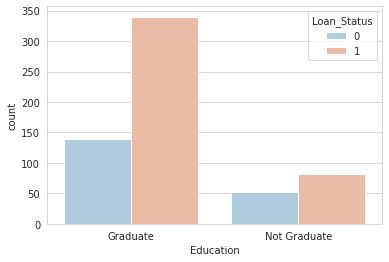

In [42]:
sns.set_style('whitegrid')
sns.countplot(x='Education',hue='Loan_Status',data=train,palette='RdBu_r')

In [43]:
train['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [44]:
d={'Not Graduate':0, 'Graduate':1}
train['Education']=train['Education'].apply(lambda x:d[x])

In [45]:
corr = train.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
Gender,1.00,-0.36,0.05,0.00,-0.06,-0.08,-0.11,0.07,-0.01,-0.02
Married,-0.36,1.00,-0.01,0.00,0.05,0.08,0.15,-0.10,0.01,0.09
Education,0.05,-0.01,1.00,0.01,0.14,0.06,0.17,0.08,0.08,0.09
Self_Employed,0.00,0.00,0.01,1.00,0.13,-0.02,0.12,-0.03,-0.00,-0.00
ApplicantIncome,-0.06,0.05,0.14,0.13,1.00,-0.12,0.57,-0.05,-0.01,-0.00
CoapplicantIncome,-0.08,0.08,0.06,-0.02,-0.12,1.00,0.19,-0.06,-0.00,-0.06
LoanAmount,-0.11,0.15,0.17,0.12,0.57,0.19,1.00,0.04,-0.01,-0.04
Loan_Amount_Term,0.07,-0.10,0.08,-0.03,-0.05,-0.06,0.04,1.00,0.00,-0.02
Credit_History,-0.01,0.01,0.08,-0.00,-0.01,-0.00,-0.01,0.00,1.00,0.56
Loan_Status,-0.02,0.09,0.09,-0.00,-0.00,-0.06,-0.04,-0.02,0.56,1.00


In [46]:
train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [47]:
test['Property_Area'].value_counts()

Urban        140
Semiurban    116
Rural        111
Name: Property_Area, dtype: int64

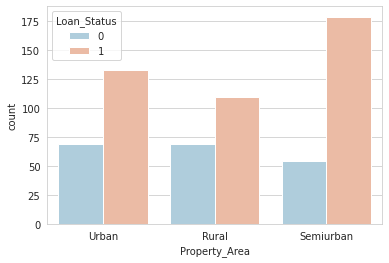

In [48]:
sns.set_style('whitegrid')
sns.countplot(x='Property_Area',hue='Loan_Status',data=train,palette='RdBu_r')

In [49]:
d={'Rural':0, 'Urban':2,'Semiurban':1}
train['Property_Area']=train['Property_Area'].apply(lambda x:d[x])

In [50]:
train.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [51]:
corr = train.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.00,-0.36,0.05,0.00,-0.06,-0.08,-0.11,0.07,-0.01,0.03,-0.02
Married,-0.36,1.00,-0.01,0.00,0.05,0.08,0.15,-0.10,0.01,0.00,0.09
Education,0.05,-0.01,1.00,0.01,0.14,0.06,0.17,0.08,0.08,0.07,0.09
Self_Employed,0.00,0.00,0.01,1.00,0.13,-0.02,0.12,-0.03,-0.00,-0.03,-0.00
ApplicantIncome,-0.06,0.05,0.14,0.13,1.00,-0.12,0.57,-0.05,-0.01,-0.01,-0.00
CoapplicantIncome,-0.08,0.08,0.06,-0.02,-0.12,1.00,0.19,-0.06,-0.00,0.01,-0.06
LoanAmount,-0.11,0.15,0.17,0.12,0.57,0.19,1.00,0.04,-0.01,-0.05,-0.04
Loan_Amount_Term,0.07,-0.10,0.08,-0.03,-0.05,-0.06,0.04,1.00,0.00,-0.08,-0.02
Credit_History,-0.01,0.01,0.08,-0.00,-0.01,-0.00,-0.01,0.00,1.00,-0.00,0.56
Property_Area,0.03,0.00,0.07,-0.03,-0.01,0.01,-0.05,-0.08,-0.00,1.00,0.03


In [52]:
train.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [53]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean(), inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].mean(), inplace=True)

In [54]:
corr = train.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.00,-0.36,0.05,0.00,-0.06,-0.08,-0.11,0.07,-0.01,0.03,-0.02
Married,-0.36,1.00,-0.01,0.00,0.05,0.08,0.15,-0.10,0.01,0.00,0.09
Education,0.05,-0.01,1.00,0.01,0.14,0.06,0.17,0.08,0.08,0.07,0.09
Self_Employed,0.00,0.00,0.01,1.00,0.13,-0.02,0.12,-0.03,-0.00,-0.03,-0.00
ApplicantIncome,-0.06,0.05,0.14,0.13,1.00,-0.12,0.57,-0.05,-0.01,-0.01,-0.00
CoapplicantIncome,-0.08,0.08,0.06,-0.02,-0.12,1.00,0.19,-0.06,-0.00,0.01,-0.06
LoanAmount,-0.11,0.15,0.17,0.12,0.57,0.19,1.00,0.04,-0.01,-0.04,-0.04
Loan_Amount_Term,0.07,-0.10,0.08,-0.03,-0.05,-0.06,0.04,1.00,0.00,-0.08,-0.02
Credit_History,-0.01,0.01,0.08,-0.00,-0.01,-0.00,-0.01,0.00,1.00,-0.00,0.56
Property_Area,0.03,0.00,0.07,-0.03,-0.01,0.01,-0.04,-0.08,-0.00,1.00,0.03


In [55]:
train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [56]:
test['Credit_History'].value_counts()

1.0    279
0.0     59
Name: Credit_History, dtype: int64

In [57]:
test["Credit_History"].fillna(1.0, inplace = True)

In [58]:
train["Credit_History"].fillna(1.0, inplace = True)

In [59]:
train.drop('Self_Employed',axis = 1,inplace = True)
test.drop('Self_Employed',axis = 1,inplace = True)

train.drop('ApplicantIncome',axis = 1,inplace = True)
test.drop('ApplicantIncome',axis = 1,inplace = True)

In [60]:
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mean(), inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].mean(), inplace=True)

In [61]:
d={'Male':0, 'Female':1}
test['Gender']=test['Gender'].apply(lambda x:d[x])

In [62]:
d={'Not Graduate':0, 'Graduate':1}
test['Education']=test['Education'].apply(lambda x:d[x])

In [63]:
d={'Rural':0, 'Urban':2,'Semiurban':1}
test['Property_Area']=test['Property_Area'].apply(lambda x:d[x])

In [64]:
d={'No':0, 'Yes':1}
test['Married']=test['Married'].apply(lambda x:d[x])

In [65]:
train.drop('Dependents',axis = 1,inplace = True)
test.drop('Dependents',axis = 1,inplace = True)

In [66]:
X_train = train.drop('Loan_Status',1)
Y_train = train.Loan_Status

In [67]:
test

,Gender,Married,Education,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,1,0,110.0,360.0,1.0,2
1,0,1,1,1500,126.0,360.0,1.0,2
2,0,1,1,1800,208.0,360.0,1.0,2
3,0,1,1,2546,100.0,360.0,1.0,2
4,0,0,0,0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...
362,0,1,0,1777,113.0,360.0,1.0,2
363,0,1,1,709,115.0,360.0,1.0,2
364,0,0,1,1993,126.0,360.0,1.0,1
365,0,1,1,2393,158.0,360.0,1.0,0


In [68]:
#Using LogisticRegression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [69]:
Y_pred = model.predict(test)

In [70]:
Y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [71]:
from numpy import savetxt

In [72]:
savetxt('Y_pred.csv', Y_pred, delimiter=',')

In [73]:
df = pd.read_csv('/content/Y_pred.csv',header=None)

In [74]:
df

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
362,1.0
363,1.0
364,1.0
365,1.0


In [75]:
df.rename(columns = {0:'w'}, inplace = True)

In [76]:
df

,w
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
362,1.0
363,1.0
364,1.0
365,1.0


In [77]:
test=pd.read_csv("https://raw.githubusercontent.com/vaasu2002/Analytics-Vidhya/main/Loan%20Prediction/test_lAUu6dG.csv")

In [78]:
id = test['Loan_ID']

In [79]:
df['Loan_ID'] = id

In [80]:
df

,w,Loan_ID
0,1.0,LP001015
1,1.0,LP001022
2,1.0,LP001031
3,1.0,LP001035
4,1.0,LP001051
...,...,...
362,1.0,LP002971
363,1.0,LP002975
364,1.0,LP002980
365,1.0,LP002986


In [81]:
x = df['w']
df['w1'] = x

In [82]:
df

,w,Loan_ID,w1
0,1.0,LP001015,1.0
1,1.0,LP001022,1.0
2,1.0,LP001031,1.0
3,1.0,LP001035,1.0
4,1.0,LP001051,1.0
...,...,...,...
362,1.0,LP002971,1.0
363,1.0,LP002975,1.0
364,1.0,LP002980,1.0
365,1.0,LP002986,1.0


In [83]:
d={1.0:'Y', 0.0:'N'}
df['w1']=df['w1'].apply(lambda x:d[x])

In [84]:
df

,w,Loan_ID,w1
0,1.0,LP001015,Y
1,1.0,LP001022,Y
2,1.0,LP001031,Y
3,1.0,LP001035,Y
4,1.0,LP001051,Y
...,...,...,...
362,1.0,LP002971,Y
363,1.0,LP002975,Y
364,1.0,LP002980,Y
365,1.0,LP002986,Y


In [85]:
df.rename(columns = {'w1':'Loan_Status'}, inplace = True)

In [86]:
df

,w,Loan_ID,Loan_Status
0,1.0,LP001015,Y
1,1.0,LP001022,Y
2,1.0,LP001031,Y
3,1.0,LP001035,Y
4,1.0,LP001051,Y
...,...,...,...
362,1.0,LP002971,Y
363,1.0,LP002975,Y
364,1.0,LP002980,Y
365,1.0,LP002986,Y


In [87]:
df.drop(columns=['w'],inplace=True)

In [88]:
df

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [89]:
 df.to_csv('submission.csv', index=False)